# Random forest model on stroke prediction

My model predicts whether a person has had a stroke or not based on the input features. 

It classifies individuals into two categories:
1) Stroke (1): The model predicts that the person has had a stroke.
2) No Stroke (0): The model predicts that the person has not had a stroke.

The prediction is based on the features provided to the model during inference. These features might include information such as gender, age, hypertension, heart disease, marital status, work type, residence type, average glucose level, BMI, and smoking status. The model analyzes these features and makes a prediction based on the patterns it has learned from the training data.


# Loading data

In [3]:
import pandas as pd

file_path = r'C:\Users\roari\Downloads\Brain.csv'
data = pd.read_csv(file_path)

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Head

In [4]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Tail

In [5]:
data.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


# Description

In [7]:
descriptive_stats = data.describe(include='all')
descriptive_stats

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981,4981.000000,4981.000000,4981.000000,4981,4981,4981,4981.000000,4981.000000,4981,4981.000000
unique,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2907,NaN,NaN,NaN,3280,2860,2532,NaN,NaN,1838,NaN
mean,NaN,43.419859,0.096165,0.055210,NaN,NaN,NaN,105.943562,28.498173,NaN,0.049789
std,NaN,22.662755,0.294848,0.228412,NaN,NaN,NaN,45.075373,6.790464,NaN,0.217531
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,14.000000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.230000,23.700000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.850000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,113.860000,32.600000,NaN,0.000000


# Information

In [10]:
data_info = data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None


# Null

In [17]:
missing_values = data.isnull().sum()

print("Null Values in the Dataset:")
print(missing_values)

Null Values in the Dataset:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# Exploring dataset

# Understanding Gender

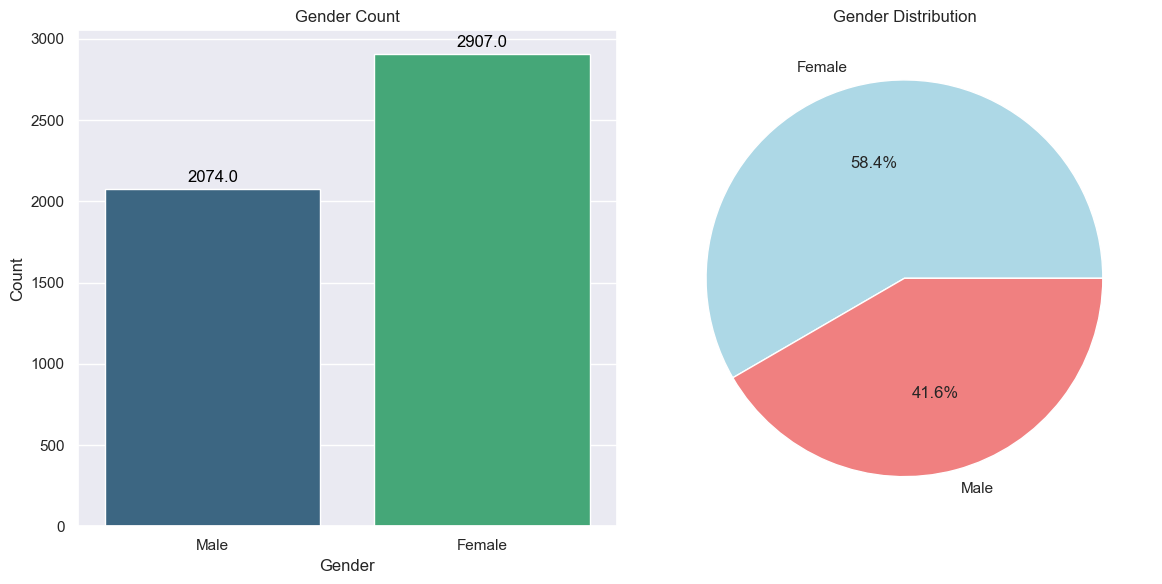

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='gender', data=data, palette='viridis')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
gender_counts = data['gender'].value_counts()
labels = gender_counts.index
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')

plt.tight_layout()

plt.show()

In [16]:
import pandas as pd

gender_counts = data['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

print("Gender Counts:")
print(gender_counts)

Gender Counts:
   Gender  Count
0  Female   2907
1    Male   2074


# Understanding Age

C:\Users\roari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


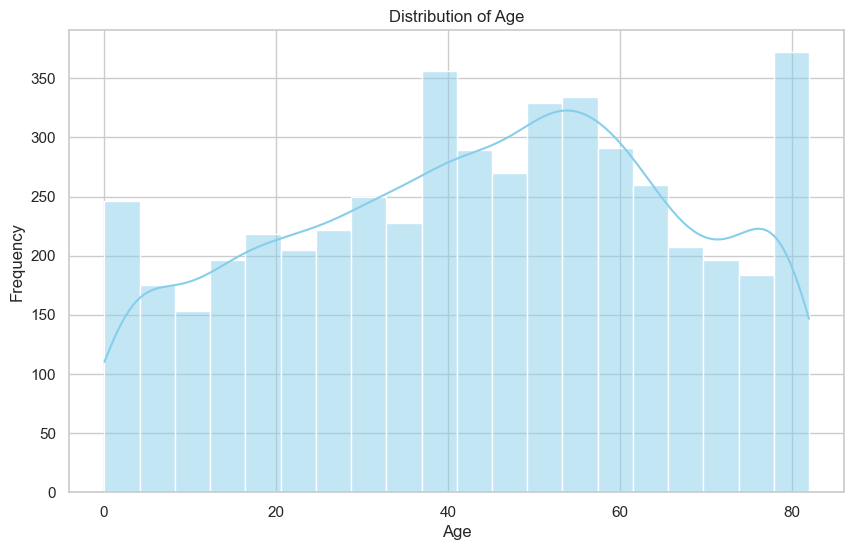

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color='skyblue')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [154]:
def map_age_group(age):
    if age <= 10:
        return '0-10'
    elif 11 <= age <= 20:
        return '11-20'
    elif 21 <= age <= 30:
        return '21-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    elif 61 <= age <= 70:
        return '61-70'
    elif 71 <= age <= 80:
        return '71-80'
    elif 81 <= age <= 90:
        return '81-90'
    else:
        return '90+'

age_counts_sorted['Age Group'] = age_counts_sorted['Age'].apply(map_age_group)

age_counts_grouped = age_counts_sorted.groupby('Age Group', as_index=False)['Count'].sum()

print("Grouped Age Counts:")
print(age_counts_grouped)

Grouped Age Counts:
  Age Group  Count
0      0-10    493
1     11-20    495
2     21-30    532
3     31-40    658
4     41-50    710
5     51-60    799
6     61-70    587
7     71-80    591
8     81-90    116


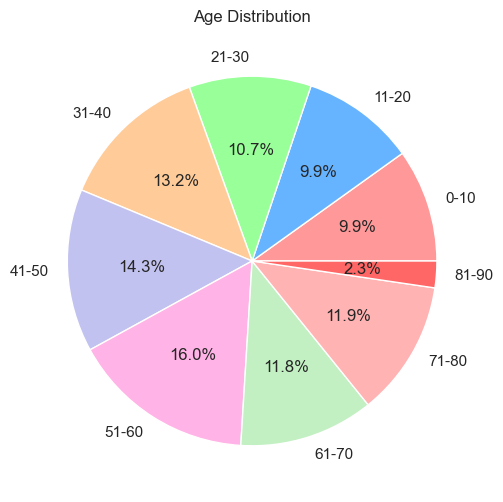

In [158]:
import matplotlib.pyplot as plt

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb3b3', '#ff6666', '#c2f0f0']

plt.figure(figsize=(8, 6))
plt.pie(age_counts_grouped['Count'], labels=age_counts_grouped['Age Group'], autopct='%1.1f%%', colors=colors)
plt.title('Age Distribution')
plt.show()

# Understanding Hypertension

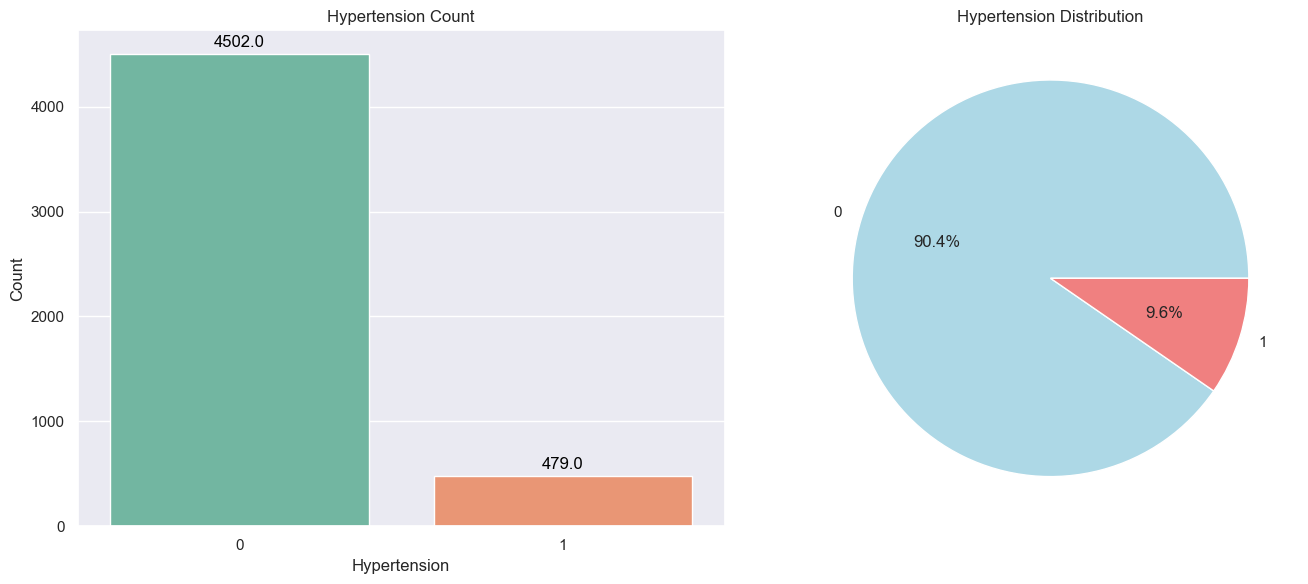

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='hypertension', data=data, palette='Set2')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Hypertension Count')
plt.xlabel('Hypertension')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
hypertension_counts = data['hypertension'].value_counts()
labels = hypertension_counts.index
plt.pie(hypertension_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Hypertension Distribution')

plt.tight_layout()

plt.show()

# Understanding Heart Disease

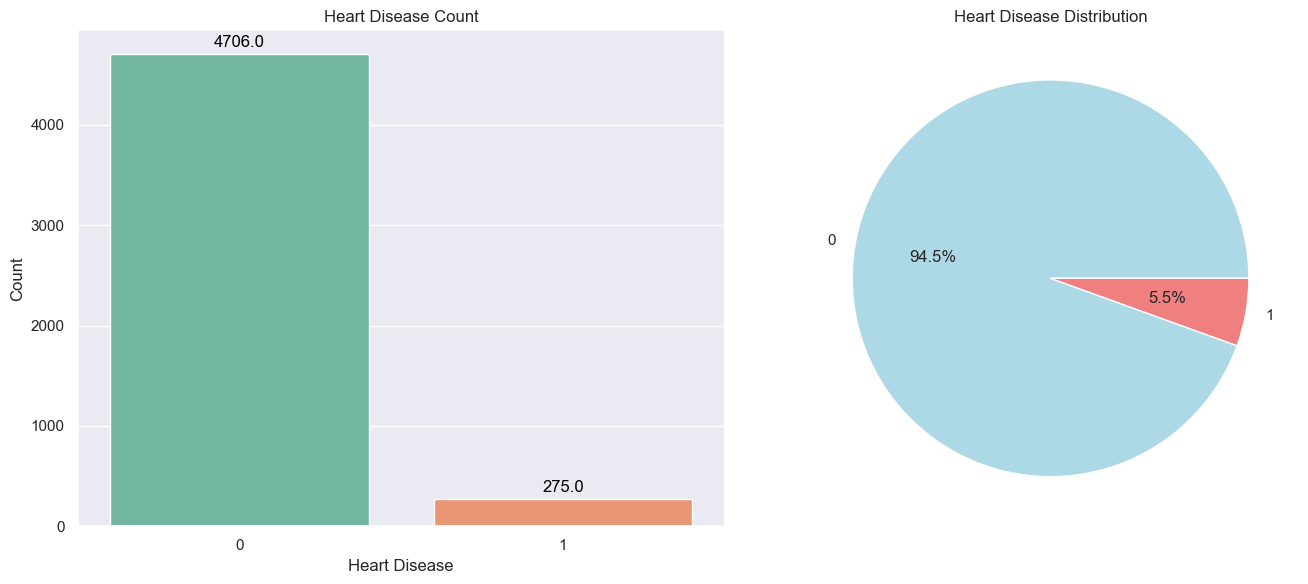

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='heart_disease', data=data, palette='Set2')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Heart Disease Count')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
heart_disease_counts = data['heart_disease'].value_counts()
labels = heart_disease_counts.index
plt.pie(heart_disease_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Heart Disease Distribution')

plt.tight_layout()

plt.show()

# Married Status

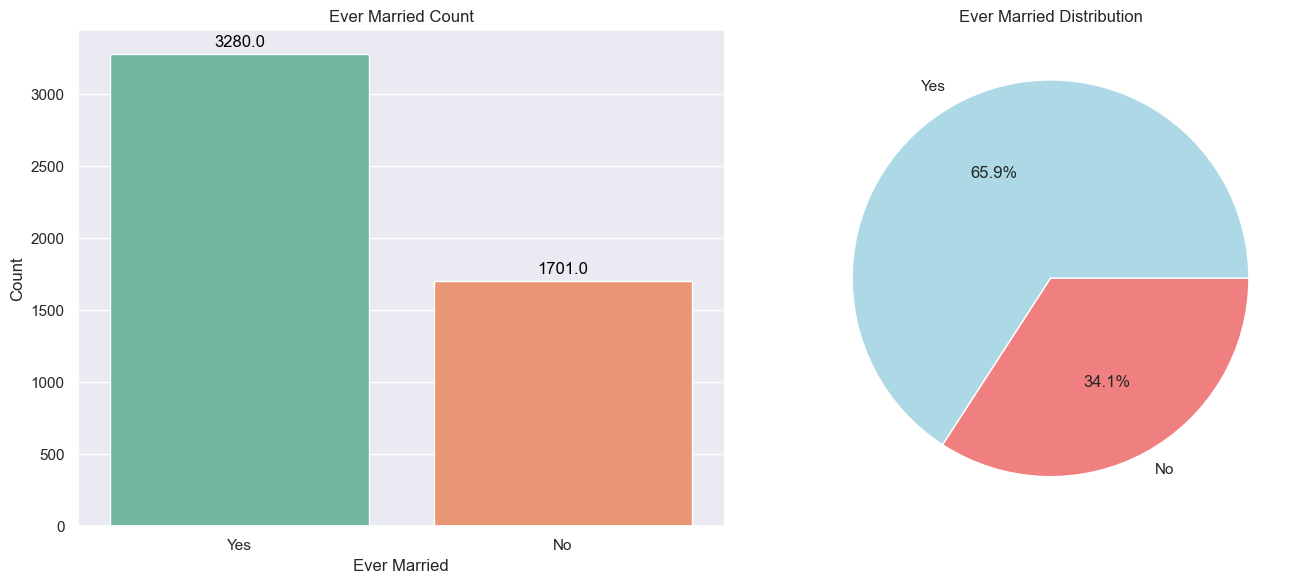

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='ever_married', data=data, palette='Set2')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Ever Married Count')
plt.xlabel('Ever Married')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
ever_married_counts = data['ever_married'].value_counts()
labels = ever_married_counts.index
plt.pie(ever_married_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Ever Married Distribution')

plt.tight_layout()

plt.show()

# Understanding Work Type

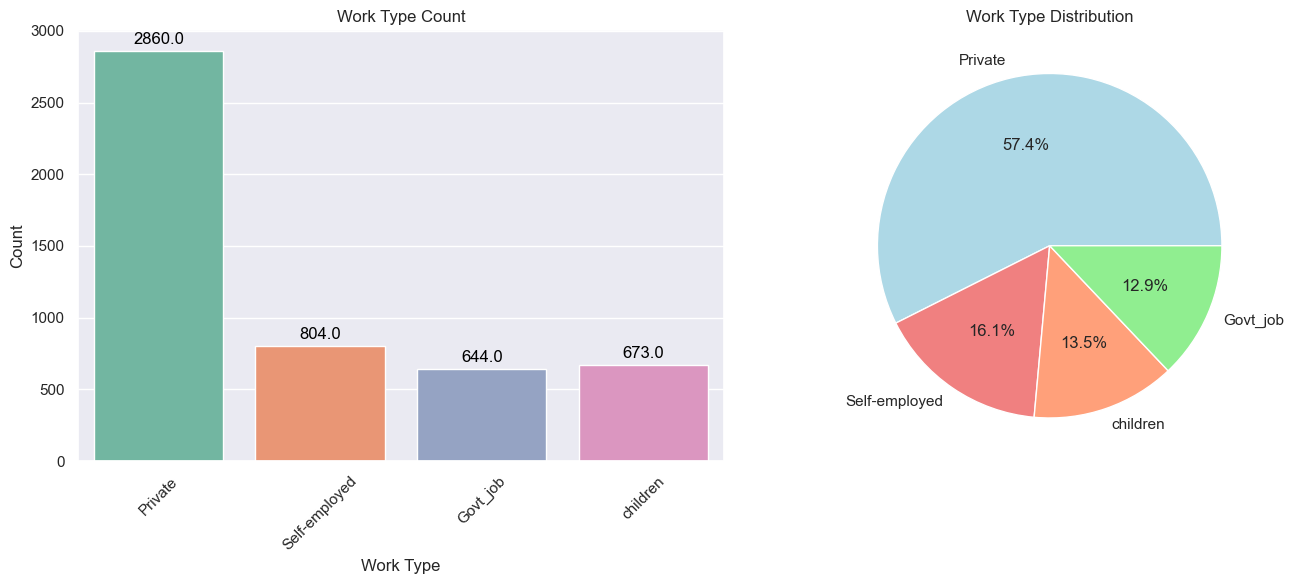

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='work_type', data=data, palette='Set2')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Work Type Count')
plt.xlabel('Work Type')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
work_type_counts = data['work_type'].value_counts()
labels = work_type_counts.index
plt.pie(work_type_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightsalmon', 'lightgreen', 'lightpink'])
plt.title('Work Type Distribution')

plt.tight_layout()

plt.show()

# Understanding Residence type

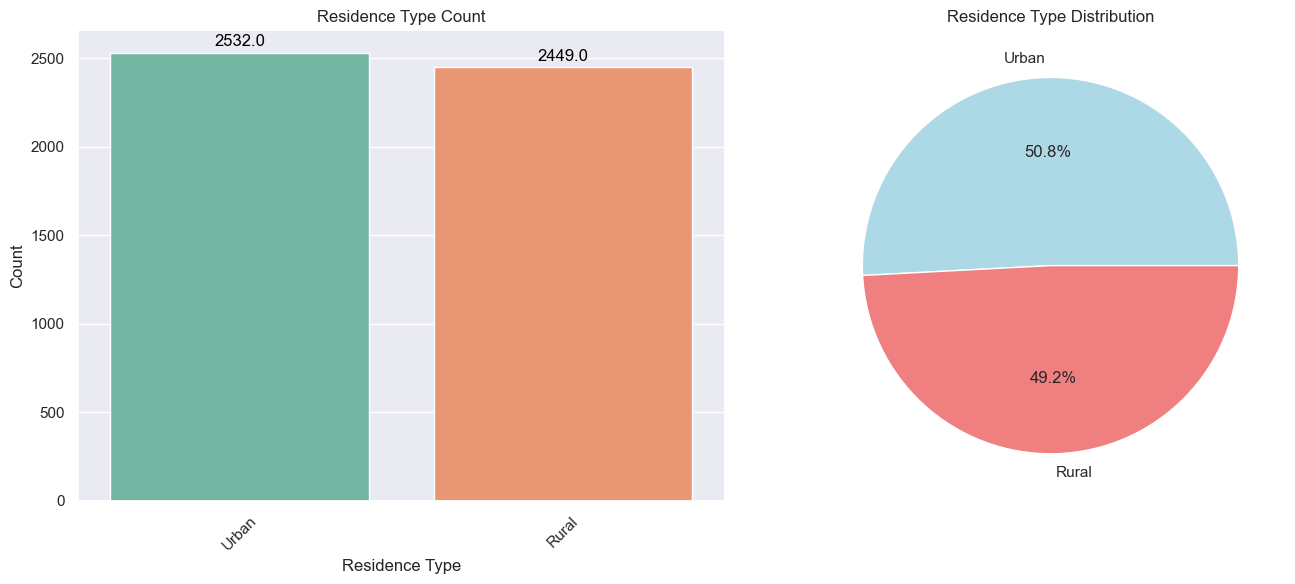

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Residence_type', data=data, palette='Set2')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Residence Type Count')
plt.xlabel('Residence Type')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
residence_type_counts = data['Residence_type'].value_counts()
labels = residence_type_counts.index
plt.pie(residence_type_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Residence Type Distribution')

plt.tight_layout()

plt.show()

# Understanding Smoking Status

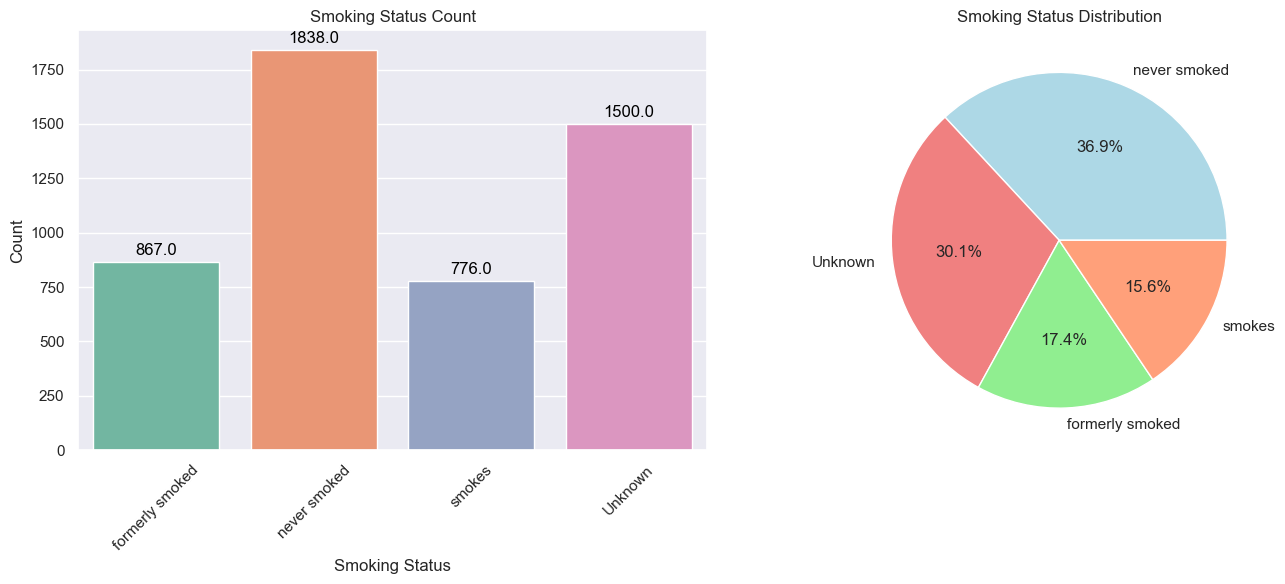

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='smoking_status', data=data, palette='Set2')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Smoking Status Count')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
smoking_status_counts = data['smoking_status'].value_counts()
labels = smoking_status_counts.index
plt.pie(smoking_status_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.title('Smoking Status Distribution')

plt.tight_layout()

plt.show()

# Understanding Smoker count

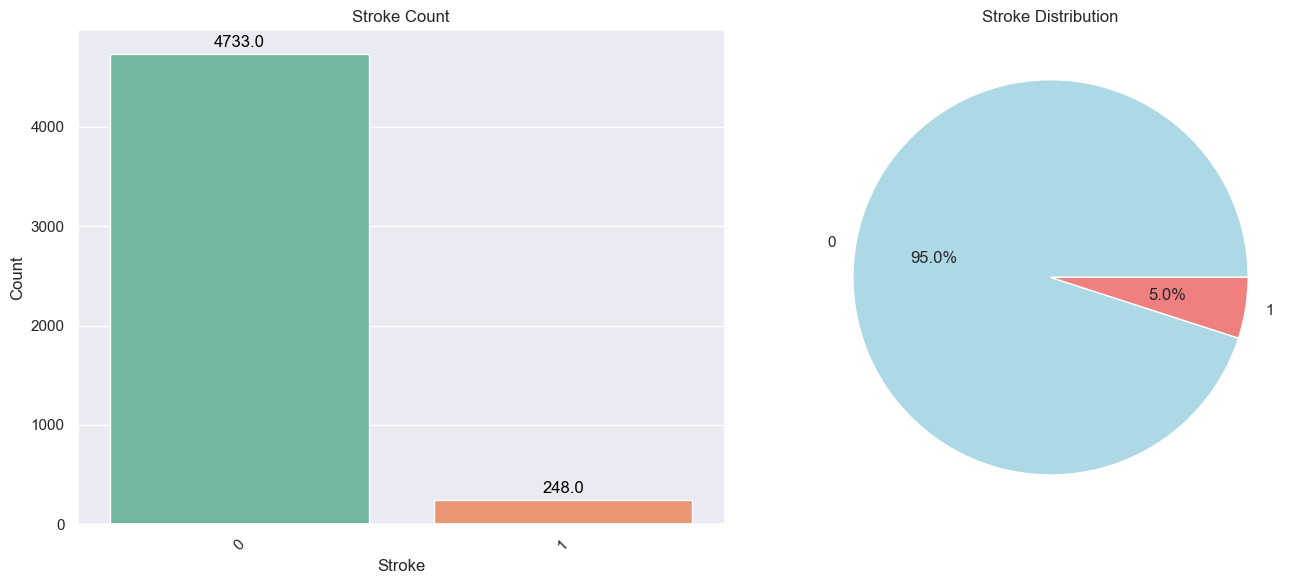

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='stroke', data=data, palette='Set2')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Stroke Count')
plt.xlabel('Stroke')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
stroke_counts = data['stroke'].value_counts()
labels = stroke_counts.index
plt.pie(stroke_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Stroke Distribution')

plt.tight_layout()

plt.show()

# Understanding Distribution of Glucose level

C:\Users\roari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


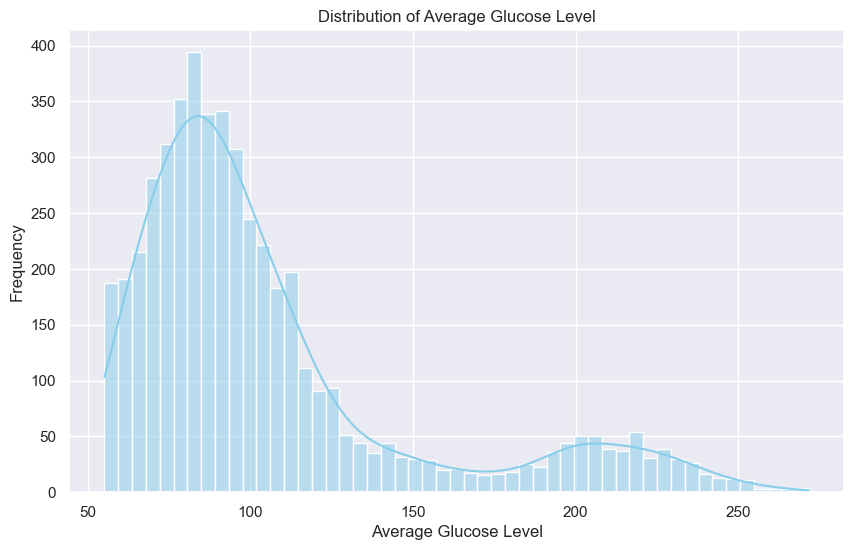

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['avg_glucose_level'], kde=True, color='skyblue')

plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')

plt.show()

# Understanding BMI

C:\Users\roari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


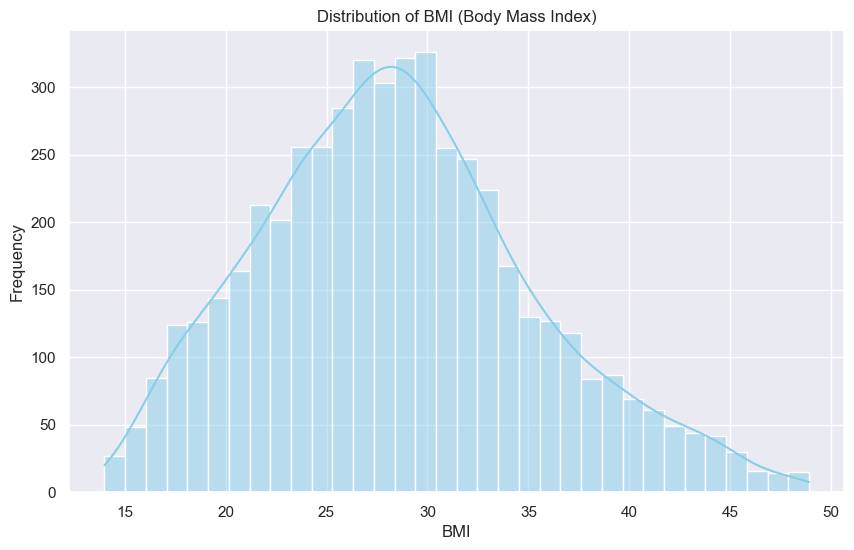

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], kde=True, color='skyblue')

plt.title('Distribution of BMI (Body Mass Index)')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()

# Random Forest model

# Model 1 - 74% Accuracy

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [79]:
file_path = "C:/Users/roari/Downloads/Brain.csv"
data = pd.read_csv(file_path)


In [87]:
stroke_samples = stroke_instances.sample(n=min(250, len(stroke_instances)), random_state=42)
non_stroke_samples = non_stroke_instances.sample(n=min(250, len(non_stroke_instances)), random_state=42)

samples = pd.concat([stroke_samples, non_stroke_samples], ignore_index=True)

X = samples.drop('stroke', axis=1)
y = samples['stroke']

In [88]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [90]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [91]:
y_pred = rf_classifier.predict(X_test)

In [92]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73        50
           1       0.73      0.76      0.75        50

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100

Confusion Matrix:
[[36 14]
 [12 38]]


# Model 2 - 96% Accuracy

In [137]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/roari/Downloads/Brain.csv')

In [138]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
           'smoking_status']
X = pd.get_dummies(data[columns])
y = data['stroke']

In [139]:
import seaborn as sns
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=250, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, n_jobs=-1)

In [142]:
train_accuracy = rf_model.score(X_train, y_train)
val_accuracy = rf_model.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.9672650475184794


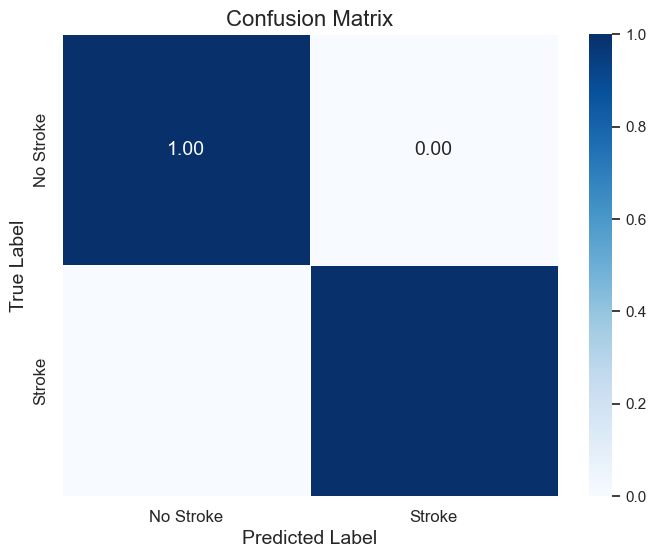

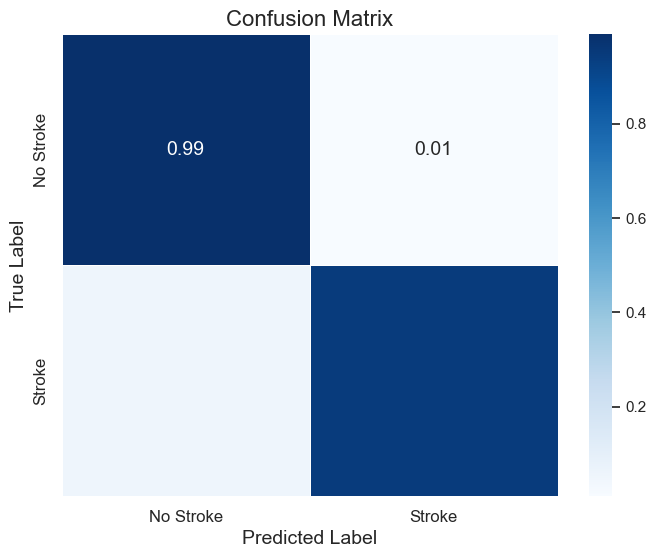

In [148]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(model, X, y, class_names, file_name, normalize=False, cmap=plt.cm.Blues):
 
    y_pred = model.predict(X)
    
    cm = confusion_matrix(y, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5, annot_kws={"size": 14})
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(file_name)
    plt.show()

plot_confusion_matrix(rf_model, X_train, y_train, ['No Stroke', 'Stroke'], 'confusion_matrix_train.png', normalize=True)

plot_confusion_matrix(rf_model, X_test, y_test, ['No Stroke', 'Stroke'], 'confusion_matrix_test.png', normalize=True)

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('C:/Users/roari/Downloads/Brain.csv')

# Separate features and target variable
X = data.drop(columns=['stroke'])
y = data['stroke']

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

# Apply the column transformer to X
X_encoded = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate accuracy on training and testing datasets
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.9418254764292878


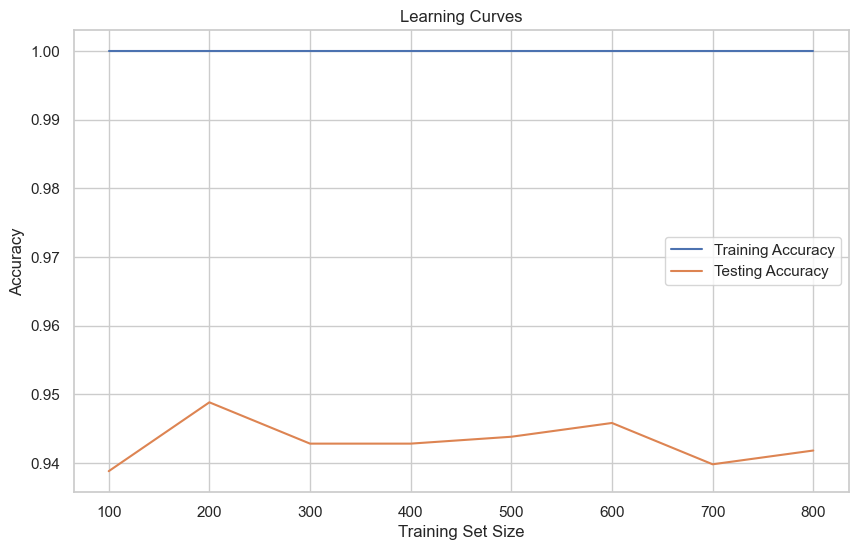

In [171]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Define different training set sizes
train_sizes = [100, 200, 300, 400, 500, 600, 700, 800]

# Iterate over different training set sizes
for size in train_sizes:
    # Train the model on a subset of the training data
    rf_model.fit(X_train[:size], y_train[:size])
    
    # Calculate accuracy on training and testing datasets
    train_accuracy = accuracy_score(y_train[:size], rf_model.predict(X_train[:size]))
    test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, label='Training Accuracy')
plt.plot(train_sizes, test_accuracies, label='Testing Accuracy')
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


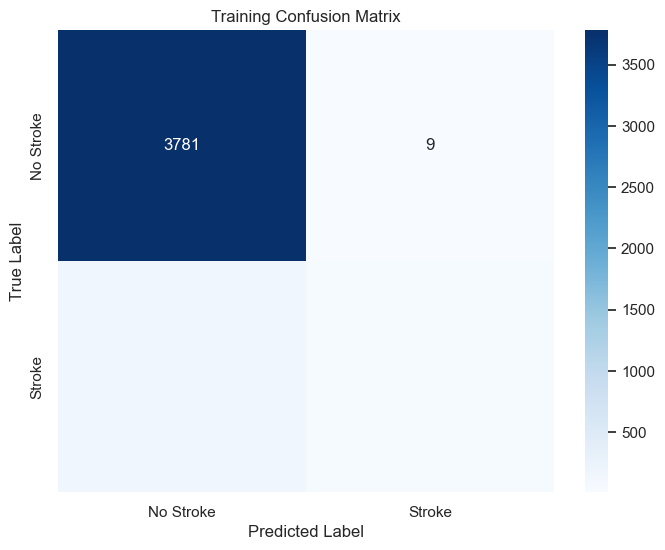

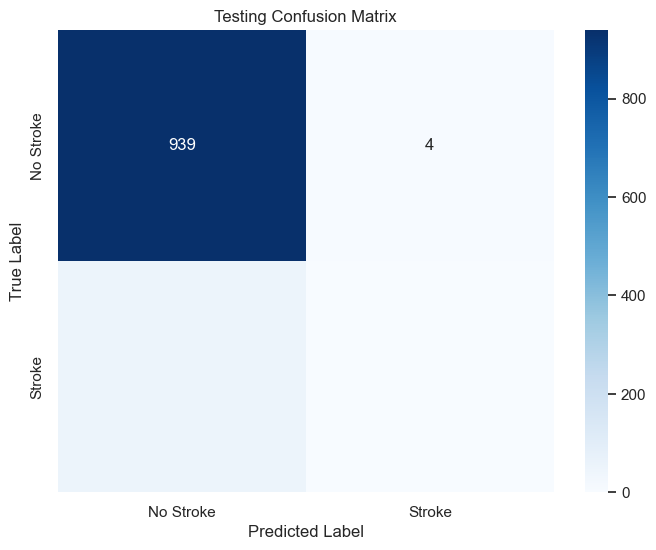

In [172]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Get predictions on training and testing datasets
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

# Calculate confusion matrices
train_cm = confusion_matrix(y_train, train_predictions)
test_cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrices
plot_confusion_matrix(train_cm, classes=['No Stroke', 'Stroke'], title='Training Confusion Matrix')
plot_confusion_matrix(test_cm, classes=['No Stroke', 'Stroke'], title='Testing Confusion Matrix')


In [173]:
# Function to print confusion matrix in text format
def print_confusion_matrix(cm, classes):
    print("Confusion Matrix:")
    print("\t\tPredicted")
    print("\t\tNo Stroke\tStroke")
    for i in range(len(classes)):
        row = "\tActual " + classes[i] + "\t"
        for j in range(len(classes)):
            row += str(cm[i][j]) + "\t\t"
        print(row)

# Print confusion matrices in text format
print_confusion_matrix(train_cm, classes=['No Stroke', 'Stroke'])
print("\n")
print_confusion_matrix(test_cm, classes=['No Stroke', 'Stroke'])



Confusion Matrix:
		Predicted
		No Stroke	Stroke
	Actual No Stroke	3781		9		
	Actual Stroke	152		42		


Confusion Matrix:
		Predicted
		No Stroke	Stroke
	Actual No Stroke	939		4		
	Actual Stroke	54		0		


# Model 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = 'C:/Users/roari/Downloads/Brain.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
# Separate the target variable 'stroke' from the features
target = 'stroke'
X = data.drop(columns=[target])
y = data[target]

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Display the first few rows of the processed features
X.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,False,True,False,True,False,True,False,False,False,True,False,True,False,False
1,80.0,0,1,105.92,32.5,False,True,False,True,False,True,False,False,True,False,False,False,True,False
2,49.0,0,0,171.23,34.4,True,False,False,True,False,True,False,False,False,True,False,False,False,True
3,79.0,1,0,174.12,24.0,True,False,False,True,False,False,True,False,True,False,False,False,True,False
4,81.0,0,0,186.21,29.0,False,True,False,True,False,True,False,False,False,True,False,True,False,False


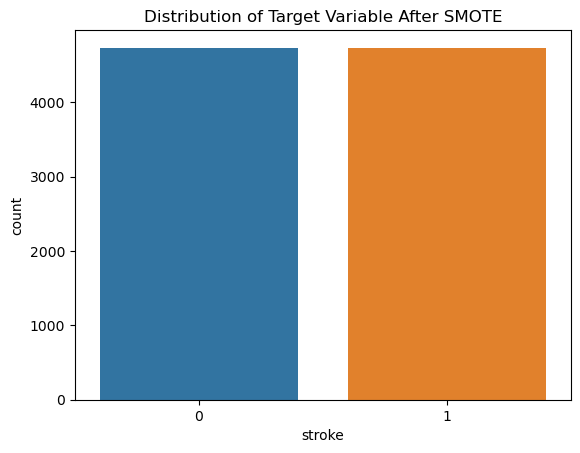

In [4]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Display the distribution of the target variable after applying SMOTE
sns.countplot(x=y_smote)
plt.title("Distribution of Target Variable After SMOTE")
plt.show()


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [6]:
# Initialize the Random Forest model with Gini Impurity
rf_model_gini = RandomForestClassifier(random_state=42, n_estimators=200, criterion='gini')

# Train the model
rf_model_gini.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [7]:
# Calculate accuracy on training and testing datasets
train_accuracy_gini = accuracy_score(y_train, rf_model_gini.predict(X_train))
test_accuracy_gini = accuracy_score(y_test, rf_model_gini.predict(X_test))

print("Training Accuracy (Gini):", train_accuracy_gini)
print("Testing Accuracy (Gini):", test_accuracy_gini)

# Generate confusion matrix for training and testing datasets
conf_matrix_train_gini = confusion_matrix(y_train, rf_model_gini.predict(X_train))
conf_matrix_test_gini = confusion_matrix(y_test, rf_model_gini.predict(X_test))

# Print classification report
print("Training Classification Report (Gini):\n", classification_report(y_train, rf_model_gini.predict(X_train)))
print("Testing Classification Report (Gini):\n", classification_report(y_test, rf_model_gini.predict(X_test)))

# Print confusion matrices
print("Training Confusion Matrix (Gini):\n", conf_matrix_train_gini)
print("Testing Confusion Matrix (Gini):\n", conf_matrix_test_gini)


Training Accuracy (Gini): 1.0
Testing Accuracy (Gini): 0.9688489968321014
Training Classification Report (Gini):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3787
           1       1.00      1.00      1.00      3785

    accuracy                           1.00      7572
   macro avg       1.00      1.00      1.00      7572
weighted avg       1.00      1.00      1.00      7572

Testing Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       946
           1       0.99      0.95      0.97       948

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894

Training Confusion Matrix (Gini):
 [[3787    0]
 [   0 3785]]
Testing Confusion Matrix (Gini):
 [[937   9]
 [ 50 898]]


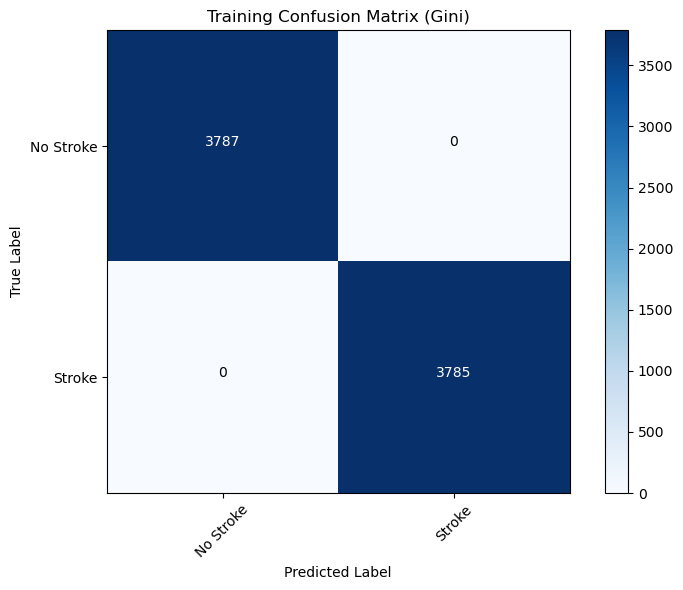

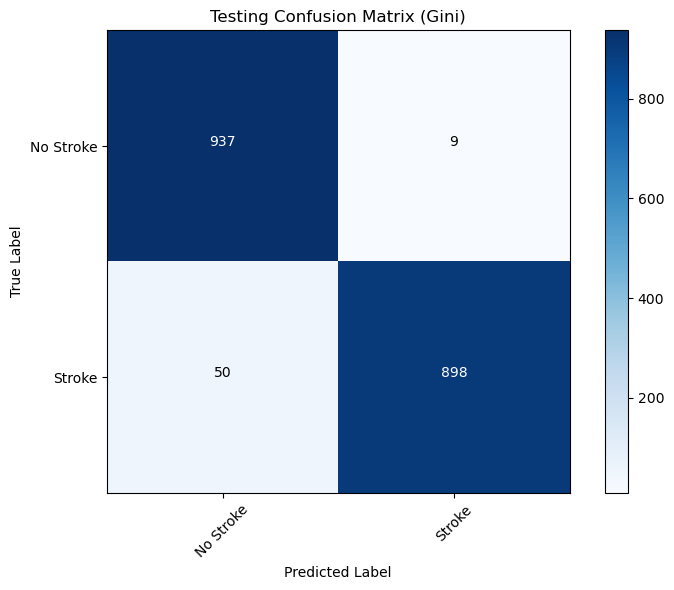

In [8]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix_train_gini, classes=['No Stroke', 'Stroke'], title='Training Confusion Matrix (Gini)')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix_test_gini, classes=['No Stroke', 'Stroke'], title='Testing Confusion Matrix (Gini)')
plt.show()


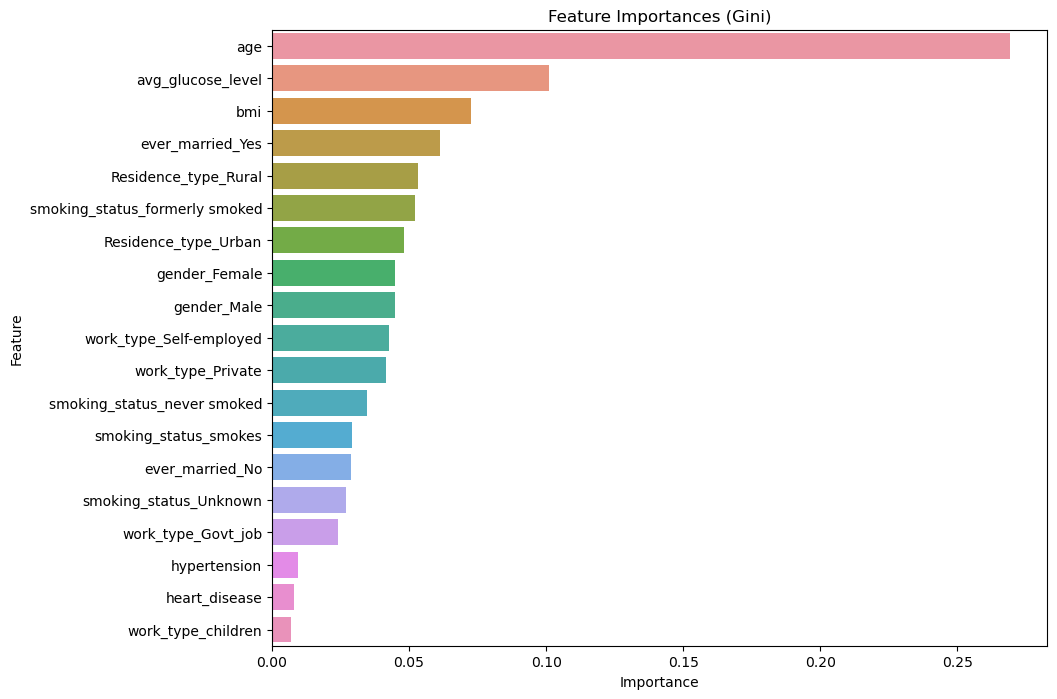

In [9]:
# Get feature importances from the model
feature_importances_gini = rf_model_gini.feature_importances_

# Create a DataFrame for visualization
feature_importances_df_gini = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_gini})

# Sort the DataFrame by importance
feature_importances_df_gini = feature_importances_df_gini.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_gini)
plt.title("Feature Importances (Gini)")
plt.show()


# NEW

# Import Libraries and Load Data

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/roari/Downloads/Brain.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Data Preprocessing, Oversampling minority class and Spliting training and testing dataset

In [15]:
# Define target and features
target = 'stroke'
X = data.drop(columns=[target])
y = data[target]

# Encode categorical variables
X = pd.get_dummies(X)

# Handle missing values if any
X.fillna(X.mean(), inplace=True)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and Train the Random Forest Model

In [16]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

# Evaluate the Model

In [17]:
# Calculate accuracy on training and testing datasets
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

print("Training Accuracy (Gini):", train_accuracy)
print("Testing Accuracy (Gini):", test_accuracy)

# Get classification reports
train_report = classification_report(y_train, rf_model.predict(X_train))
test_report = classification_report(y_test, rf_model.predict(X_test))

print("Training Classification Report (Gini):\n", train_report)
print("Testing Classification Report (Gini):\n", test_report)

# Get confusion matrices
train_cm = confusion_matrix(y_train, rf_model.predict(X_train))
test_cm = confusion_matrix(y_test, rf_model.predict(X_test))

print("Training Confusion Matrix (Gini):\n", train_cm)
print("Testing Confusion Matrix (Gini):\n", test_cm)


Training Accuracy (Gini): 1.0
Testing Accuracy (Gini): 0.9688489968321014
Training Classification Report (Gini):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3787
           1       1.00      1.00      1.00      3785

    accuracy                           1.00      7572
   macro avg       1.00      1.00      1.00      7572
weighted avg       1.00      1.00      1.00      7572

Testing Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       946
           1       0.99      0.95      0.97       948

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894

Training Confusion Matrix (Gini):
 [[3787    0]
 [   0 3785]]
Testing Confusion Matrix (Gini):
 [[937   9]
 [ 50 898]]


# Perform Cross-Validation

In [18]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')

# Print cross-validation scores and the mean score
print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Score: ", cv_scores.mean())


Cross-Validation Scores:  [0.76768743 0.9904963  0.99577614 0.99155227 0.9936642  0.99894403
 0.99048626 0.99048626 0.99154334 0.98414376]
Mean Cross-Validation Score:  0.9694779999598152


# Introduce Regularization

In [31]:
# Recreate the model with regularization parameters
rf_model_reg = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Fit the regularized model
rf_model_reg.fit(X_train, y_train)

# Evaluate the regularized model
train_accuracy_reg = accuracy_score(y_train, rf_model_reg.predict(X_train))
test_accuracy_reg = accuracy_score(y_test, rf_model_reg.predict(X_test))

print("Training Accuracy (Reg):", train_accuracy_reg)
print("Testing Accuracy (Reg):", test_accuracy_reg)

# Get the classification report and confusion matrix for the regularized model
train_report_reg = classification_report(y_train, rf_model_reg.predict(X_train))
test_report_reg = classification_report(y_test, rf_model_reg.predict(X_test))

train_cm_reg = confusion_matrix(y_train, rf_model_reg.predict(X_train))
test_cm_reg = confusion_matrix(y_test, rf_model_reg.predict(X_test))

print("Training Classification Report (Reg):\n", train_report_reg)
print("Testing Classification Report (Reg):\n", test_report_reg)

print("Training Confusion Matrix (Reg):\n", train_cm_reg)
print("Testing Confusion Matrix (Reg):\n", test_cm_reg)


Training Accuracy (Reg): 0.9795298468040148
Testing Accuracy (Reg): 0.9640971488912354
Training Classification Report (Reg):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3787
           1       0.99      0.97      0.98      3785

    accuracy                           0.98      7572
   macro avg       0.98      0.98      0.98      7572
weighted avg       0.98      0.98      0.98      7572

Testing Classification Report (Reg):
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       946
           1       0.98      0.95      0.96       948

    accuracy                           0.96      1894
   macro avg       0.96      0.96      0.96      1894
weighted avg       0.96      0.96      0.96      1894

Training Confusion Matrix (Reg):
 [[3732   55]
 [ 100 3685]]
Testing Confusion Matrix (Reg):
 [[925  21]
 [ 47 901]]


# Plotting Learning Curves

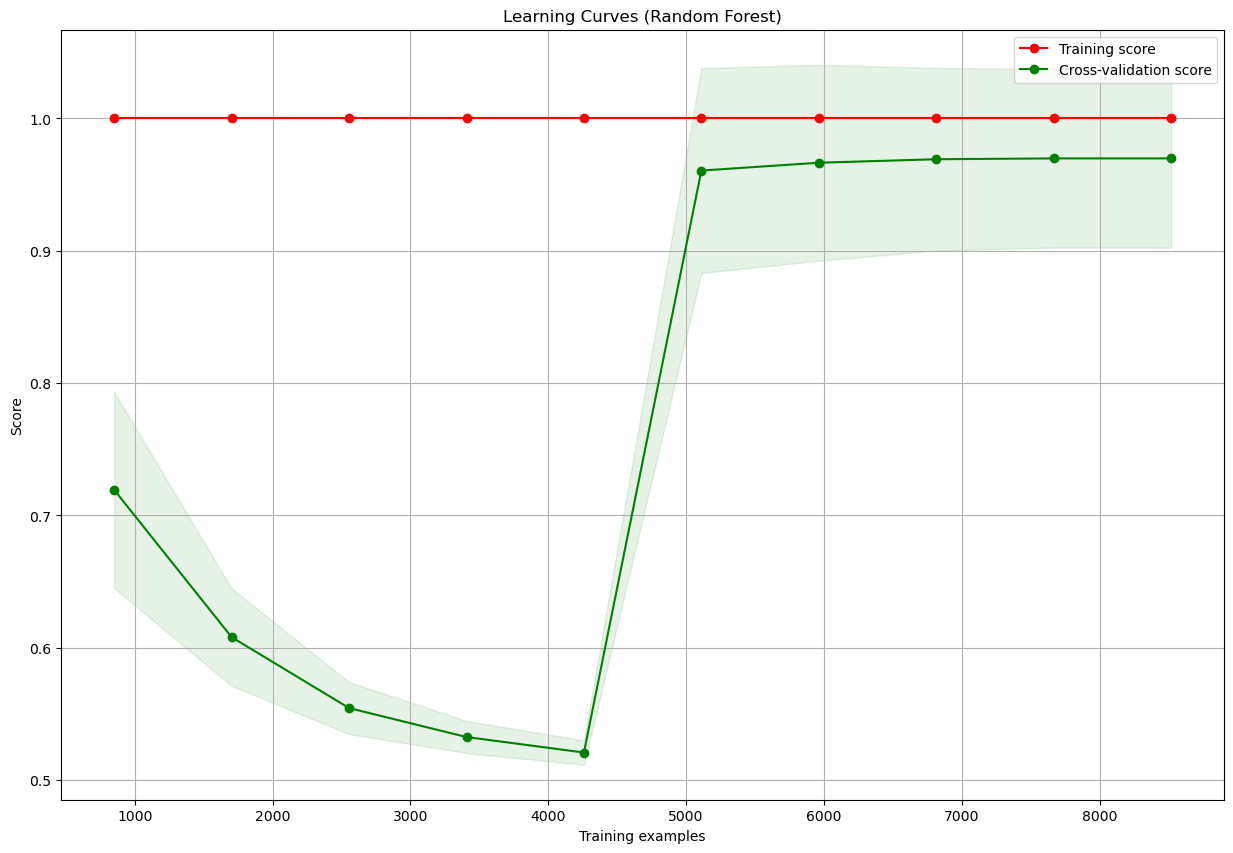

In [24]:
# Plot Learning Curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15, 10))
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# NEW

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/roari/Downloads/Brain.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Define target and features
target = 'stroke'
X = data.drop(columns=[target])
y = data[target]

# Encode categorical variables
X = pd.get_dummies(X)

# Handle missing values if any
X.fillna(X.mean(), inplace=True)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


In [33]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [34]:
# Calculate accuracy on training and testing datasets
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

print("Training Accuracy (Gini):", train_accuracy)
print("Testing Accuracy (Gini):", test_accuracy)

# Get classification reports
train_report = classification_report(y_train, rf_model.predict(X_train))
test_report = classification_report(y_test, rf_model.predict(X_test))

print("Training Classification Report (Gini):\n", train_report)
print("Testing Classification Report (Gini):\n", test_report)

# Get confusion matrices
train_cm = confusion_matrix(y_train, rf_model.predict(X_train))
test_cm = confusion_matrix(y_test, rf_model.predict(X_test))

print("Training Confusion Matrix (Gini):\n", train_cm)
print("Testing Confusion Matrix (Gini):\n", test_cm)


Training Accuracy (Gini): 1.0
Testing Accuracy (Gini): 0.9688489968321014
Training Classification Report (Gini):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3787
           1       1.00      1.00      1.00      3785

    accuracy                           1.00      7572
   macro avg       1.00      1.00      1.00      7572
weighted avg       1.00      1.00      1.00      7572

Testing Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       946
           1       0.99      0.95      0.97       948

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894

Training Confusion Matrix (Gini):
 [[3787    0]
 [   0 3785]]
Testing Confusion Matrix (Gini):
 [[937   9]
 [ 50 898]]


In [35]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')

# Print cross-validation scores and the mean score
print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Score: ", cv_scores.mean())


Cross-Validation Scores:  [0.76768743 0.9904963  0.99577614 0.99155227 0.9936642  0.99894403
 0.99048626 0.99048626 0.99154334 0.98414376]
Mean Cross-Validation Score:  0.9694779999598152


In [36]:
# Recreate the model with regularization parameters
rf_model_reg = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Fit the regularized model
rf_model_reg.fit(X_train, y_train)

# Evaluate the regularized model
train_accuracy_reg = accuracy_score(y_train, rf_model_reg.predict(X_train))
test_accuracy_reg = accuracy_score(y_test, rf_model_reg.predict(X_test))

print("Training Accuracy (Reg):", train_accuracy_reg)
print("Testing Accuracy (Reg):", test_accuracy_reg)

# Get the classification report and confusion matrix for the regularized model
train_report_reg = classification_report(y_train, rf_model_reg.predict(X_train))
test_report_reg = classification_report(y_test, rf_model_reg.predict(X_test))

train_cm_reg = confusion_matrix(y_train, rf_model_reg.predict(X_train))
test_cm_reg = confusion_matrix(y_test, rf_model_reg.predict(X_test))

print("Training Classification Report (Reg):\n", train_report_reg)
print("Testing Classification Report (Reg):\n", test_report_reg)

print("Training Confusion Matrix (Reg):\n", train_cm_reg)
print("Testing Confusion Matrix (Reg):\n", test_cm_reg)


Training Accuracy (Reg): 0.9795298468040148
Testing Accuracy (Reg): 0.9640971488912354
Training Classification Report (Reg):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3787
           1       0.99      0.97      0.98      3785

    accuracy                           0.98      7572
   macro avg       0.98      0.98      0.98      7572
weighted avg       0.98      0.98      0.98      7572

Testing Classification Report (Reg):
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       946
           1       0.98      0.95      0.96       948

    accuracy                           0.96      1894
   macro avg       0.96      0.96      0.96      1894
weighted avg       0.96      0.96      0.96      1894

Training Confusion Matrix (Reg):
 [[3732   55]
 [ 100 3685]]
Testing Confusion Matrix (Reg):
 [[925  21]
 [ 47 901]]


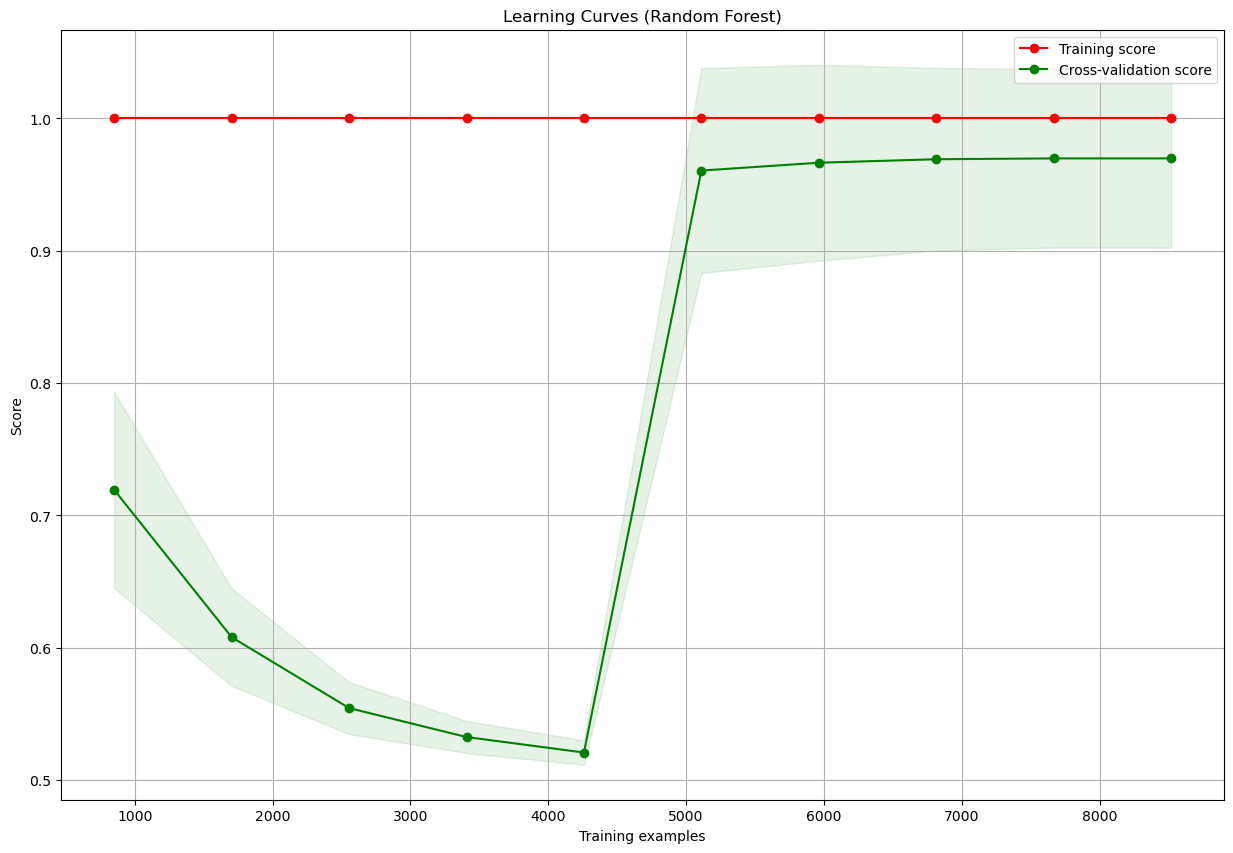

In [37]:
# Plot Learning Curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15, 10))
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()
